# Mucobiome 

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import biom

## biom data Import

In [58]:
# Loading biom data 
biomdata = biom.load_table("xp2.biom")

# Normalisation 
# biomdata.norm()

In [670]:
# Convert biom data to pandas dataframe 
df = biomdata.to_dataframe()
# Hack ... need to divide by 2 because read count are duplicate 
df = (df/2).astype(int)

In [671]:
print("Sample count ", len(df.columns))
print("OTU count ", len(df.index))


Sample count  188
OTU count  33957


### OTUs table preview

In [672]:
df.head()

,1001,1003,1015,1029,1036,1037,1039,1042,1043,1048,...,3239,3247,3252,3256,3257,3258,3265,3270,3284,3292
1000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000006,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,2,0,3,0,0,0
1000009,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1000020,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [673]:
sample = biomdata.metadata_to_dataframe(axis="sample")
taxa   = biomdata.metadata_to_dataframe(axis="observation")

### Sample datas preview

In [674]:
sample.head()

,AGE,CATEGORIE,CENTRE,IMC,POIDS,SEXE,TAILLE,TYPE_MUTA
1001,37,Free,Brest,"0,0","0,0",FEMME,"0,0",DeltaF508 heterozygote
1003,12,Never,Brest,"14,4",13,FEMME,095,DeltaF508 homozygote
1015,31,Never,Brest,"20,1",40,FEMME,141,DeltaF508 heterozygote
1029,17,Free,Brest,"14,1",19,FEMME,116,DeltaF508 heterozygote
1036,31,Never,Brest,"17,6",49,FEMME,167,DeltaF508 homozygote


### Taxa datas preview

In [675]:
taxa.head()

,taxonomy_0,taxonomy_1,taxonomy_2,taxonomy_3,taxonomy_4,taxonomy_5,taxonomy_6
1000000,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__
1000006,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parainfluenzae
1000009,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,s__aureus
1000020,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,s__aureus
1000028,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__


### Create multi index : phylum , genus, ID

In [688]:
# Create multiIndex to store both id and genus name as row ID
mm_df = df.copy()
mm_df.index = pd.MultiIndex.from_tuples(list(zip(taxa["taxonomy_1"],taxa["taxonomy_5"], df.index)))
mm_df.index.names = ["phyla","genus","id"]

In [689]:
mm_df.head()

1001  1003  1015  1029  1036  \
phyla             genus             id                                      
p__Firmicutes     g__Streptococcus  1000000     0     0     0     0     0   
p__Proteobacteria g__Haemophilus    1000006     0     1     0     0     0   
p__Firmicutes     g__Staphylococcus 1000009     0     0     0     0     0   
                                    1000020     0     0     0     1     0   
                  g__Streptococcus  1000028     0     0     0     0     0   

                                             1037  1039  1042  1043  1048  \
phyla             genus             id                                      
p__Firmicutes     g__Streptococcus  1000000     0     0     0     0     0   
p__Proteobacteria g__Haemophilus    1000006     0     1     0     0     0   
p__Firmicutes     g__Staphylococcus 1000009     0     0     0     1     0   
                                    1000020     0     0     0     0     0   
                  g__Streptococcus  1000028     0     0     0     0     0   

                                             ...   3239  3247  3252  3256  \
phyla             genus             id       ...                            
p__Firmicutes     g__Streptococcus  1000000  ...      0     0     0     0   
p__Proteobacteria g__Haemophilus    1000006  ...      1     0     0     0   
p__Firmicutes     g__Staphylococcus 1000009  ...      0     0     0     0   
                                    1000020  ...      0     0     0     0   
                  g__Streptococcus  1000028  ...      0     0     0     0   

                                             3257  3258  3265  3270  3284  \
phyla             genus             id                                      
p__Firmicutes     g__Streptococcus  1000000     0     0     0     0     0   
p__Proteobacteria g__Haemophilus    1000006     2     0     3     0     0   
p__Firmicutes     g__Staphylococcus 1000009     0     0     0     0     0   
                                    1000020     0     0     0     0     0   
                  g__Streptococcus  1000028     0     0     0     0     0   

                                             3292  
phyla             genus             id             
p__Firmicutes     g__Streptococcus  1000000     0  
p__Proteobacteria g__Haemophilus    1000006     0  
p__Firmicutes     g__Staphylococcus 1000009     0  
                                    1000020     0  
                  g__Streptococcus  1000028     0  

[5 rows x 188 columns]

In [693]:
# Group by genus and sum read count 
# take a long time ... don't know why
%time genus_df = mm_df.sum(level="genus")
%time phila_df = mm_df.sum(level="phyla")

CPU times: user 9min 2s, sys: 8 ms, total: 9min 2s
Wall time: 9min 2s
CPU times: user 1min 9s, sys: 48 ms, total: 1min 9s
Wall time: 4h 10min 17s


In [694]:
print("genus count " ,agg_genus_df.shape[0])
agg_genus_df.head()

genus count  135


,1001,1003,1015,1029,1036,1037,1039,1042,1043,1048,...,3239,3247,3252,3256,3257,3258,3265,3270,3284,3292
g__,2.0,423.0,96.0,590.0,2.0,403.0,731.0,346.0,215.0,87.0,...,425.0,32.0,549.0,649.0,269.0,885.0,605.0,769.0,683.0,693.0
g__Abiotrophia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Achromobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Acidovorax,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Acinetobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [695]:
order_mask = agg_genus_df.sum(axis=1).sort_values(ascending=False).index

In [696]:
# select index where read sum > 10 
t_read_count = agg_genus_df.loc[order_mask].sum(axis=1)

### Normalize

In [697]:
norm_genus_df = (agg_genus_df/agg_genus_df.sum() * 100).loc[order_mask]

In [698]:
norm_genus_df.head()

,1001,1003,1015,1029,1036,1037,1039,1042,1043,1048,...,3239,3247,3252,3256,3257,3258,3265,3270,3284,3292
g__Streptococcus,52.946489,22.057093,5.200360,1.729620,1.217017,14.293806,11.509841,22.577355,11.317512,5.131229,...,26.248384,25.002059,4.275953,8.089244,39.439600,8.930663,26.374056,17.680461,18.169800,29.012126
g__Neisseria,0.530594,16.669763,6.659163,15.591041,0.043080,20.951547,37.933160,18.806906,31.612349,0.380987,...,38.781185,0.045301,4.428581,18.889696,17.472429,46.773370,0.000000,42.609481,24.230531,0.182775
g__Haemophilus,46.133439,17.258035,1.463305,19.651281,94.620355,22.928788,9.475585,2.489705,4.766312,3.543783,...,3.520934,0.181204,16.411111,46.259985,4.821749,32.986997,11.674588,2.168115,17.343524,0.008916
g__Staphylococcus,0.000000,0.012385,0.013507,50.553828,3.882606,22.362391,13.068557,1.424308,10.755603,88.038220,...,0.023499,7.791780,6.823679,0.621318,11.143883,0.000000,9.795918,0.197884,0.607313,5.327211
g__Granulicatella,0.050802,8.656883,0.522287,0.723296,0.016155,2.342825,4.006869,4.397597,3.437562,0.066522,...,4.077077,0.016473,0.878202,4.280642,6.142601,2.315246,4.042494,1.312054,8.072712,13.083987


### Create global resume table

In [522]:
t_relative_abundance_mean = norm_genus_df.mean(axis=1)
t_relative_abundance_std  = norm_genus_df.std(axis=1)
t_relative_abundance_min  = norm_genus_df.min(axis=1)
t_relative_abundance_max  = norm_genus_df.max(axis=1)
t_prevalence              = (norm_genus_df > 0).sum(axis=1)

In [523]:
# Most abundant N
most_abundance_per_samples = norm_genus_df.apply(lambda x: x.idxmax(), axis=0)
t_most_abundance           =  pd.Series(norm_genus_df.index).apply(lambda x: (most_abundance_per_samples == x).sum())
t_most_abundance.index     = norm_genus_df.index

In [524]:
global_df = pd.DataFrame(
    {
            "read_count"     : t_read_count,
            "abundance_mean" : t_relative_abundance_mean,
            "abudance_std"   : t_relative_abundance_std,
            "abundance_min"  : t_relative_abundance_min,
            "abundance_max"  : t_relative_abundance_max,
            "prevalence"     : t_prevalence,
            "most_abondance" : t_most_abundance
    }, 
    columns = ["read_count","abundance_mean","abudance_std","abundance_min","abundance_max","prevalence","most_abondance"],
    dtype = int
)



#### raw rable

In [525]:
global_df.head(50)

,read_count,abundance_mean,abudance_std,abundance_min,abundance_max,prevalence,most_abondance
Streptococcus,1063452,25,19,0,89,188,72
Neisseria,917491,19,19,0,94,183,59
Haemophilus,650883,14,23,0,99,185,30
Staphylococcus,312757,6,15,0,97,176,11
Granulicatella,183240,4,4,0,32,186,0
Prevotella,180617,4,4,0,27,188,2
Gemella,150127,3,3,0,17,182,0
Stenotrophomonas,117913,3,14,0,95,57,7
,104459,2,2,0,22,187,0
Fusobacterium,101070,2,3,0,25,182,1


### percent table 

In [526]:
global_df_percent = ((global_df/global_df.sum() * 100).round(2))
global_df_percent.head(50)

,read_count,abundance_mean,abudance_std,abundance_min,abundance_max,prevalence,most_abondance
Streptococcus,24.39,29.07,14.07,NaN,9.17,3.18,38.30
Neisseria,21.04,22.09,14.07,NaN,9.68,3.10,31.38
Haemophilus,14.93,16.28,17.04,NaN,10.20,3.13,15.96
Staphylococcus,7.17,6.98,11.11,NaN,9.99,2.98,5.85
Granulicatella,4.20,4.65,2.96,NaN,3.30,3.15,0.00
Prevotella,4.14,4.65,2.96,NaN,2.78,3.18,1.06
Gemella,3.44,3.49,2.22,NaN,1.75,3.08,0.00
Stenotrophomonas,2.70,3.49,10.37,NaN,9.78,0.96,3.72
,2.40,2.33,1.48,NaN,2.27,3.16,0.00
Fusobacterium,2.32,2.33,2.22,NaN,2.57,3.08,0.53


## Core microbiota

In [527]:
core_microbiota = norm_genus_df.index[(norm_genus_df > 0.1).sum(axis=1) > 188/2]

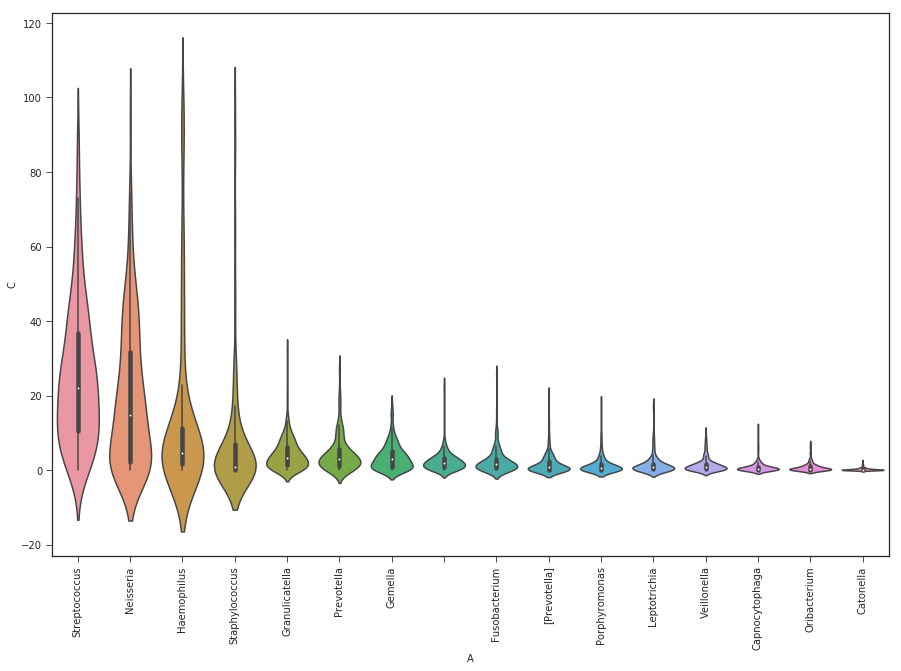

In [654]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)

dataplot = norm_genus_df.loc[core_microbiota].stack().reset_index()
dataplot.columns = ["A","B","C"]
g = sns.violinplot(x="A",y="C", data=dataplot, ax=ax, scale="width")

for i in g.get_xticklabels():
    i.set_rotation(90)


## Phylum analysis

In [700]:
phila_df = (phila_df / phila_df.sum() * 100).round(2)

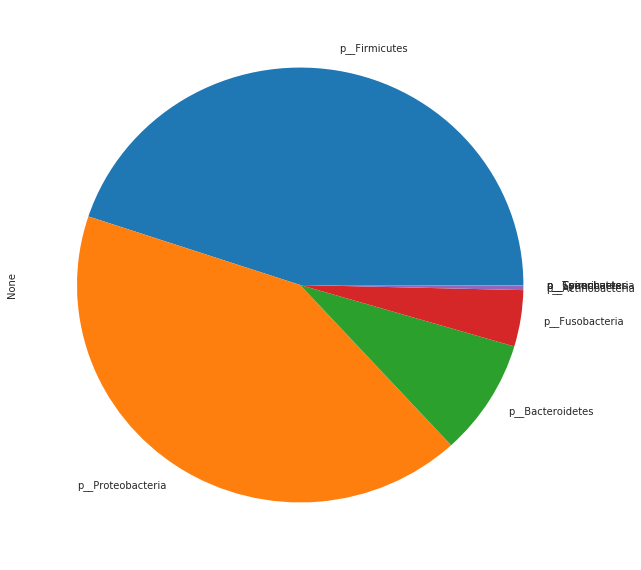

In [716]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 10)
temp = phila_df.sum(axis=1)
temp[temp > 0.3].plot(kind="pie")

In [736]:
import skbio

In [744]:
beta = skbio.diversity.beta_diversity("euclidean", np.array(genus_df.transpose()))

/home/sacha/miniconda3/envs/bioinfo/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.2072101018250447e-06 and the largest is 9079874275.983932.
  RuntimeWarning


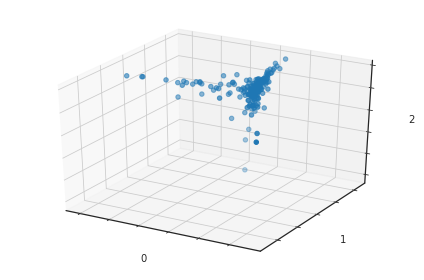

In [747]:
skbio.stats.ordination.pcoa(beta)